1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

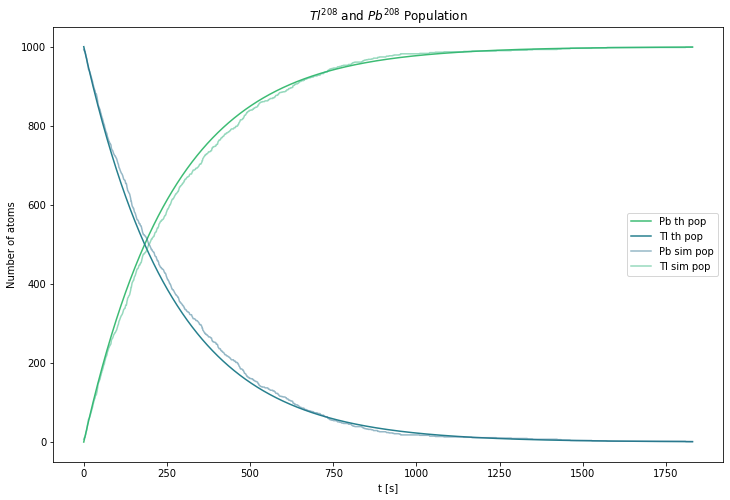

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def random_color(): return plt.cm.viridis(np.random.rand())

tau = 3.052*60 # in seconds
time=int(tau*10)

def p(t): return 1-2**(-t/tau)


#Evolution of the population
Tl, Pb = 1000,0
pop=np.empty((time,2))
for t in range(time):
    for atom in range(Tl):
        if (np.random.random() < p(1))and(Tl>0): #decay after 1 sec
            Tl -=1
            Pb +=1
    pop[t]=[Tl, Pb]
    
x = np.arange(0,time, 1)    
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,1000*p(x), c=random_color(),label='Pb th pop')
ax.plot(x,1000*(1-p(x)),c=random_color(), label='Tl th pop')
ax.set_title("$Tl^{208}$ and $Pb^{208}$ Population")
ax.set_xlabel('t [s]')
ax.set_ylabel('Number of atoms')

ax.plot(x,pop[:,0], color=random_color(), alpha=0.5,label='Pb sim pop')
ax.plot(x,pop[:,1], color=random_color(), alpha=0.5,label='Tl sim pop')
ax.legend()


Text(0, 0.5, 'CDF')

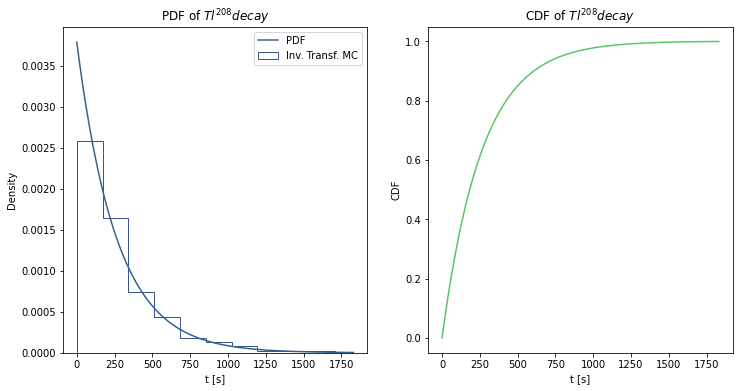

In [23]:
def pdf(t): return 2**(-t/tau) * np.log(2)/tau
def cdf(t): return integrate.quad(pdf,0,t)[0]
def icdf(p): return tau*np.log2(1/(1-p))

u = np.random.random(1000)
decay_time = icdf(u)

fig, ax = plt.subplots(ncols=2,figsize=(12,6))
ax[0].plot(x,pdf(x), c=random_color(),label='PDF')
ax[0].hist(decay_time, color=random_color(), histtype='step', label="Inv. Transf. MC", density=True)
ax[0].set_title("PDF of $Tl^{208} decay$")
ax[0].set_xlabel("t [s]")
ax[0].set_ylabel("Density")
ax[0].legend()

ax[1].plot(x,[cdf(x) for x in x], c=random_color())
ax[1].set_title("CDF of $Tl^{208} decay$")
ax[1].set_xlabel("t [s]")
ax[1].set_ylabel("CDF")


Text(0, 0.5, 'Remaining number of Tl atoms')

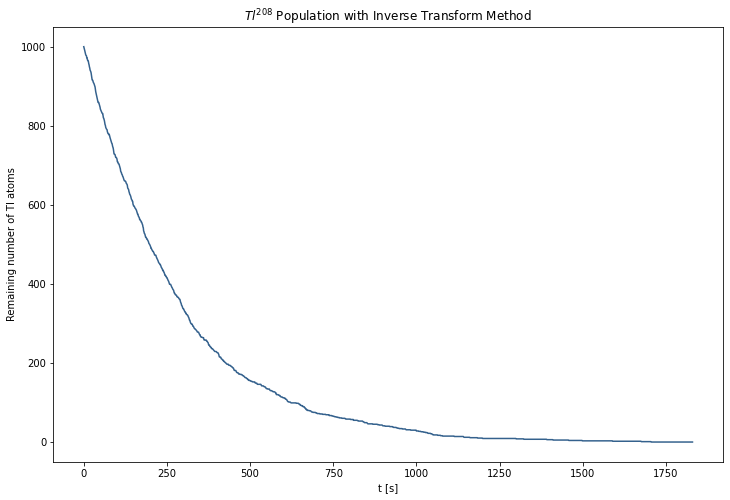

In [25]:
distrib = [len(decay_time[decay_time>i]) for i in range(time)]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,distrib, c=random_color())
ax.set_title("$Tl^{208}$ Population with Inverse Transform Method")
ax.set_xlabel('t [s]')
ax.set_ylabel('Remaining number of Tl atoms')


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Text(0, 0.5, 'f(x)')

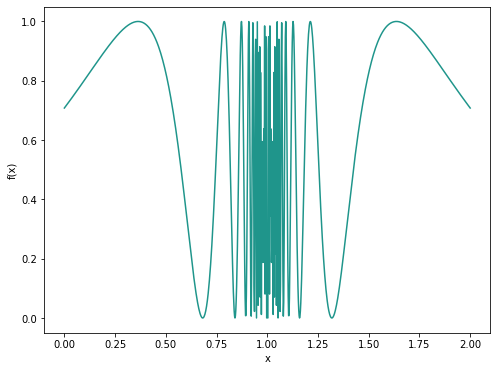

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Getting nice random colors
def random_color(): return plt.cm.viridis(np.random.rand())

def f(x):
    return np.sin(1/(1-x))**2

x=np.linspace(0, 2, 1000)
fig, _  = plt.subplots(figsize=(8, 6))
plt.plot(x,f(x), c=random_color())
plt.xlabel('x')
plt.ylabel("f(x)")

Hit or miss method [N=1000]: I = 1.346 +- 0.030
Mean Value method [N=1000]:  I = 1.346 +- 0.021


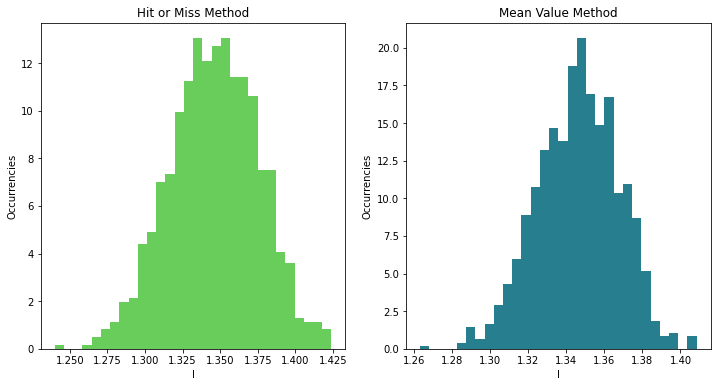

In [3]:
# Hit or miss method
def hit_or_miss(f,N,xrange,yrange): 
    count = 0
    for i in range(N):
        x,y = np.random.uniform(xrange[0],xrange[1]), np.random.uniform(yrange[0],yrange[1])
        if y < f(x): count += 1
        
    return count *  (xrange[1]-xrange[0])*(yrange[1]-yrange[0]) / N

# mean Value method [yrange isn't used but in this way I can freely recall these two function by passing the same parameters] 
def mean_value_method(f,N,xrange,yrange): 
    a,b = xrange[0],xrange[1]
    x = np.random.uniform(a,b,N)
    return np.mean(f(x))*(b-a)

#Plotting integral distributions
def distrb_hist(ax,x,xlabel,ylabel,title, label):
    h, bins, _ = ax.hist(x, bins=30, color=random_color(), density=True, label=label)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

#Evaluating integrals
n_iter = 1000
def MCintegral(method,N): return [method(f,N,[0,2],[0,1]) for i in range(n_iter)]


I1,I2, = MCintegral(hit_or_miss,1000), MCintegral(mean_value_method,1000)

fig, ax = plt.subplots(ncols=2,figsize=(12, 6))
distrb_hist(ax[0],I1,'I',"Occurrencies","Hit or Miss Method","Hit or Miss")
distrb_hist(ax[1],I2,'I',"Occurrencies","Mean Value Method","Mean Value")

print("Hit or miss method [N=1000]: I = %.3f +- %.3f" % (np.mean(I1),np.std(I1)) )
print("Mean Value method [N=1000]:  I = %.3f +- %.3f" % (np.mean(I2),np.std(I2)) )

In [ ]:
#STD for increasing N of random points
N_points = np.arange(100,1000,100)
std_1 = [np.std(MCintegral(hit_or_miss,N)) for N in N_points]
std_2 = [np.std(MCintegral(mean_value_method,N)) for N in N_points]

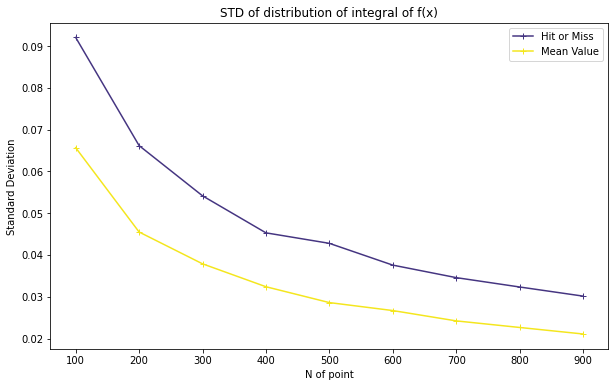

In [7]:
fig, ax  = plt.subplots(figsize=(10, 6))
ax.plot(N_points,std_1, c=random_color(), marker="+", label="Hit or Miss")
ax.plot(N_points,std_2, c=random_color(), marker="+", label="Mean Value")
ax.set_title("STD of distribution of integral of f(x)")
ax.set_xlabel("N of point")
ax.set_ylabel("Standard Deviation")
ax.legend()


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

The area of the circle with Monte Carlo method is: 3.142 +- 0.016
The volume of the hypersphere 10D with Monte Carlo method is: 2.574 +- 0.514


Text(0.5, 1.0, 'Circle with Monte Carlo')

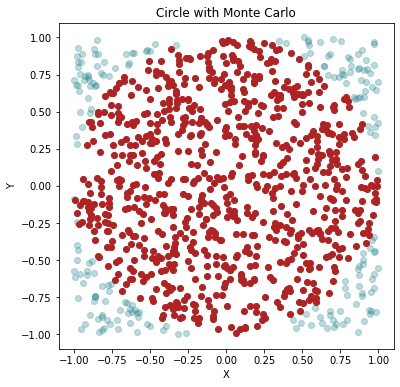

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
def random_color(): return plt.cm.viridis(np.random.rand())


# mean Value method for Circle
def vol_sphere(N,dim,n_iter):    
    V=2**dim #In each dimension the volume is [-1,1]
    vol=[]
    for i in range(n_iter):
        x = np.random.uniform(-1,1,(N,dim))
        f = la.norm(x, axis=1)**2
        vol.append( V/N * len(f[f<1]) )# Count 1 of the norm is <1
    return [np.mean(vol), np.std(vol)]

#Volume calculations
circle = vol_sphere(10000, 2, 1000)
print('The area of the circle with Monte Carlo method is: %.3f +- %.3f'%(circle[0], circle[1]))

sphere10D = vol_sphere(10000, 10, 1000)
print('The volume of the hypersphere 10D with Monte Carlo method is: %.3f +- %.3f'%(sphere10D[0], sphere10D[1]))


#Plotting the circle
points = np.random.uniform(-1,1,(1000,2))
circle_point = points[la.norm(points, axis=1)**2<1]

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(points.T[0],points.T[1], alpha=0.3,color=random_color())
ax.scatter(circle_point.T[0],circle_point.T[1],color='firebrick')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Circle with Monte Carlo')


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

Importance Sampling method [N=1e5 points]:  I = 0.8390 +- 0.0014


<AxesSubplot:title={'center':'Importance Sampling method'}, xlabel='I', ylabel='Occurrencies'>

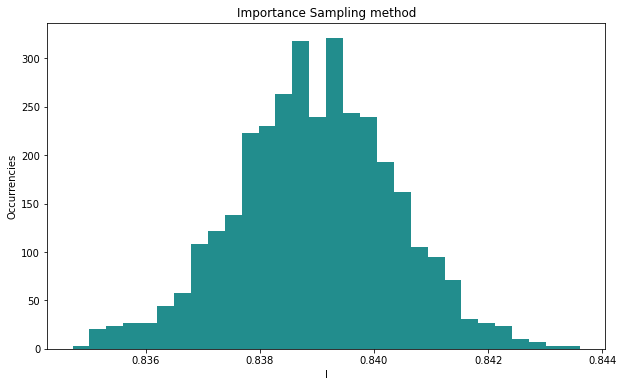

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def random_color(): return plt.cm.viridis(np.random.rand())

def f(x): return 1/np.sqrt(x)/(np.exp(x)+1)
def w(x): return 1/np.sqrt(x)


def imp_samp(f,w,N,a,b): 
    u = np.random.uniform(a,b,N)
    x = (u)**2 #Inverse Transform method for w/2 (normalized pdf of w), x is distributed like w 
    return np.mean(f(x)/w(x))*integrate.quad(w,a,b)[0] #Integral analytically is 2

n_iter=1000
I = [imp_samp(f,w,10000,0,1) for i in range(n_iter)]

print("Importance Sampling method [N=1e5 points]:  I = %.4f +- %.4f" % (np.mean(I),np.std(I)) )


#Plotting integral distributions
def distrb_hist(ax,x,xlabel,ylabel,title):
    h, bins, _ = ax.hist(x, bins=30, color=random_color(), density=True)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

fig, ax = plt.subplots(figsize=(10, 6))
distrb_hist(ax,I,'I',"Occurrencies","Importance Sampling method")
